# Image Processing Assignments - Jupyter Notebook

This notebook contains the implementation of the image processing activities outlined in Assignment No. 1 and Assignment No. 2.

**Instructions for Submission:**

1. Implement all activities using Python.
2. Submit a printed (hard copy) report that includes the code, output images, and a brief analysis.
3. Show the code and the output results for each activity (original image + filtered/enhanced image).

## Assignment No. 1: Basic Gray Level Transformations

This section covers fundamental gray-level transformations used to manipulate the intensity values of individual pixels in an image. These techniques are often used for image enhancement and contrast adjustment.

### Activity 1: Thresholding

**Description:**
Thresholding is a gray-level transformation technique that enhances image contrast by modifying pixel intensity values based on a specified threshold, $m$. Pixel values below the threshold are set to a lower intensity (e.g., black), and values above the threshold are set to a higher intensity (e.g., white). This results in a binary or high-contrast image that highlights specific features of interest.

**Task:**
Implement thresholding using Python. Show the code and the output result (original image and thresholded image).

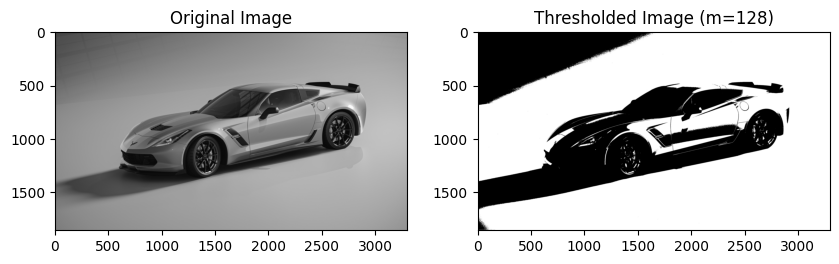

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Define the threshold value (m)
    threshold_value = 128

    # Apply thresholding
    # cv2.threshold returns a tuple: (ret, thresholded_image)
    # ret is the threshold value used, which we already know
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Display original and thresholded images
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(thresholded_image, cmap='gray'), plt.title(f'Thresholded Image (m={threshold_value})')
    plt.show()

### Activity 2: Negative Transformation

**Description:**
Negative transformation inverts the gray levels of an image. For an image with intensity values ranging from 0 to $L-1$, the transformation is given by $s = (L-1) - r$, where $r$ is the original pixel intensity and $s$ is the transformed intensity. This transformation reverses the intensity levels, making light areas appear dark and vice versa. It is useful for enhancing features in dark regions.

**Task:**
Write a Python script to perform negative transformation of an input image. Show the code and the output result (original and negative image, along with histograms).

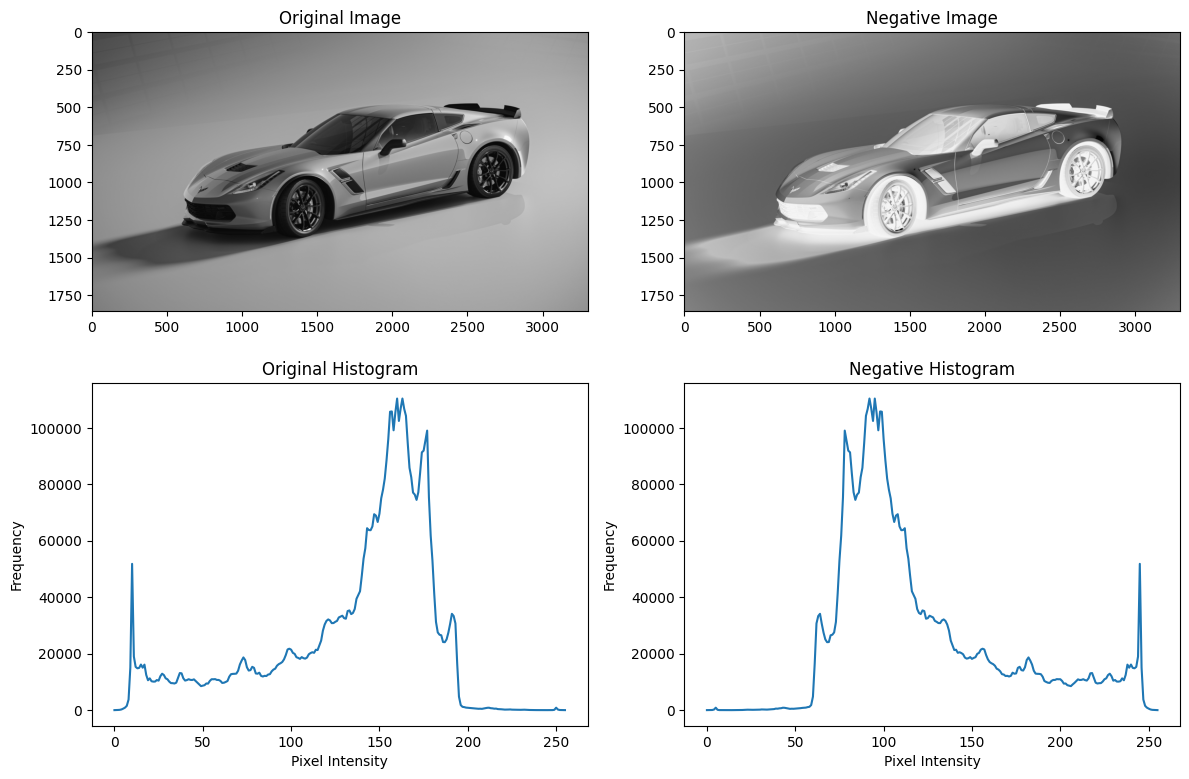

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Apply negative transformation (assuming 8-bit image, max value is 255)
    negative_image = 255 - image

    # Calculate histograms
    original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    negative_hist = cv2.calcHist([negative_image], [0], None, [256], [0, 256])

    # Display original and negative images and their histograms
    plt.figure(figsize=(12, 8))
    plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(222), plt.imshow(negative_image, cmap='gray'), plt.title('Negative Image')
    plt.subplot(223), plt.plot(original_hist), plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
    plt.subplot(224), plt.plot(negative_hist), plt.title('Negative Histogram')
    plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Activity 3: Logarithmic Transformation

**Description:**
Logarithmic transformation is used to expand the range of dark pixel values while compressing the range of bright ones. It is defined as: $s = c \cdot \log(1+r)$, where $c$ is a scaling constant, $r$ is the original pixel intensity, and $s$ is the transformed intensity. This is particularly effective for images with a large range of intensity values and improves detail visibility in darker areas.

**Task:**
Implement a logarithmic transformation in Python. Show the code and the output result (original image and log-transformed image).

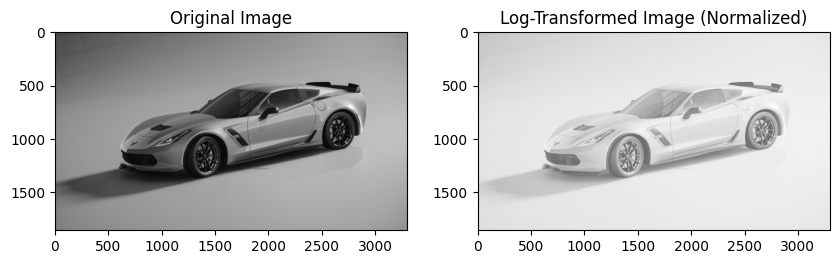

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Apply logarithmic transformation: s = c * log(1 + r)
    # Calculate the scaling factor c to map the maximum value to 255
    c = 255 / np.log(1 + np.max(image))
    log_transformed_image = c * np.log(1 + image)

    # Convert the result back to uint8 (0-255 range)
    log_transformed_image = np.array(log_transformed_image, dtype=np.uint8)

    # Display original and log-transformed images
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(log_transformed_image, cmap='gray'), plt.title('Log-Transformed Image')
    plt.show()

### Activity 4: Power-Law (Gamma) Transformation

**Description:**
This transformation modifies the contrast of an image according to the equation: $s = c \cdot r^{\gamma}$, where $c$ is a scaling constant (often 1), $r$ is the original pixel intensity, $s$ is the transformed intensity, and $\gamma$ (gamma) determines the degree of enhancement. It is widely used in gamma correction and image enhancement. Different values of $\gamma$ can brighten or darken an image and affect the contrast.

* If $\gamma < 1$, the transformation expands the range of dark pixel values and compresses the range of bright pixel values, brightening the image.
* If $\gamma > 1$, the transformation compresses the range of dark pixel values and expands the range of bright pixel values, darkening the image.
* If $\gamma = 1$, the transformation is linear and has no effect on the image.

**Task:**
Write Python code to apply a power-law transformation on an image using different values of $\gamma$. Show the code and the output result (original image and transformed images for various $\gamma$ values).

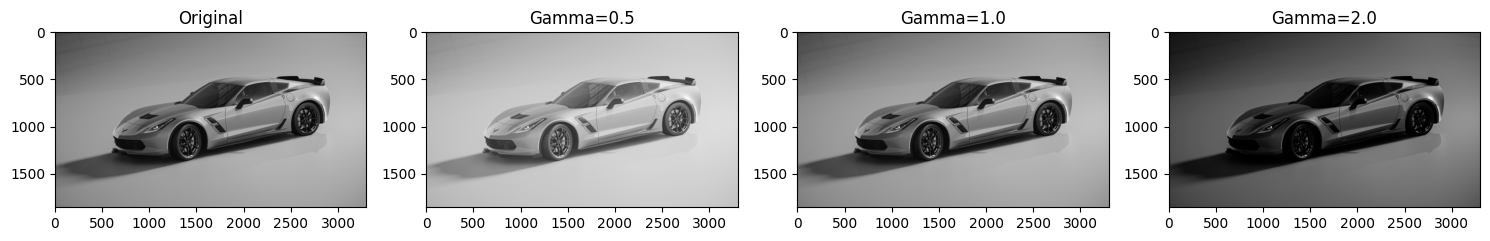

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Define gamma values to experiment with
    gamma_values = [0.5, 1.0, 2.0]

    # Normalize pixel values to the range [0, 1] for gamma correction
    image_normalized = image / 255.0

    # Apply power-law transformation for each gamma value: s = r^gamma (assuming c=1)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(gamma_values) + 1, 1), plt.imshow(image, cmap='gray'), plt.title('Original')

    for i, gamma in enumerate(gamma_values):
        # Apply gamma correction formula
        gamma_corrected_image_normalized = np.power(image_normalized, gamma)
        # Scale back to the range [0, 255]
        gamma_corrected_image = np.array(gamma_corrected_image_normalized * 255, dtype='uint8')
        plt.subplot(1, len(gamma_values) + 1, i + 2), plt.imshow(gamma_corrected_image, cmap='gray'), plt.title(f'Gamma={gamma}')

    plt.tight_layout()
    plt.show()

## Assignment No. 2: Spatial Domain Processing

This section focuses on spatial domain processing techniques, which operate directly on the pixels of an image. These methods are used for tasks such as contrast manipulation, feature highlighting, and filtering.

### Activity 1: Contrast Stretching

**Description:**
Contrast stretching is a technique that improves the visibility of features in low-contrast images by expanding their gray-level range. Piecewise linear contrast stretching maps a specific range of input intensity values to a wider range of output intensity values, while other ranges can be compressed or left unchanged.

**Task:**
Write a Python script to perform piecewise linear contrast stretching.

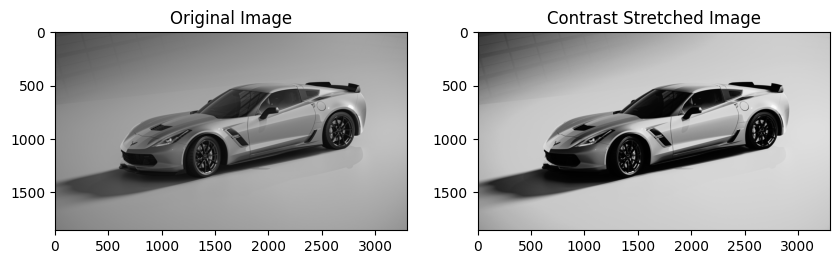

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Implement piecewise linear contrast stretching function
    def piecewise_linear_stretch(image, r1, s1, r2, s2):
        stretched_image = np.zeros_like(image, dtype=np.uint8)
        # Calculate slopes for each segment
        slope1 = s1 / r1 if r1 != 0 else 0
        slope2 = (s2 - s1) / (r2 - r1) if (r2 - r1) != 0 else 0
        slope3 = (255 - s2) / (255 - r2) if (255 - r2) != 0 else 0

        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                r = image[i, j]
                if 0 <= r <= r1:
                    stretched_image[i, j] = slope1 * r
                elif r1 < r <= r2:
                    stretched_image[i, j] = slope2 * (r - r1) + s1
                else:
                    stretched_image[i, j] = slope3 * (r - r2) + s2
        return stretched_image

    # Define parameters for contrast stretching (adjust these based on your image)
    # r1, s1: point 1 (input intensity, output intensity)
    # r2, s2: point 2 (input intensity, output intensity)
    r1, s1, r2, s2 = 50, 10, 150, 200

    # Apply contrast stretching
    stretched_image = piecewise_linear_stretch(image, r1, s1, r2, s2)

    # Display original and stretched images
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(stretched_image, cmap='gray'), plt.title('Contrast Stretched Image')
    plt.show()

### Activity 2: Gray Level Slicing

**Description:**
Gray level slicing highlights specific ranges of intensities in an image, enhancing features of interest such as tissues or structures. There are two main approaches:

1.  **Highlighting the range:** Pixels within the specified intensity range are set to a high value (e.g., white), and all other pixels are set to a low value (e.g., black), resulting in a binary image.
2.  **Preserving the range:** Pixels within the specified intensity range retain their original values, while all other pixels are set to a low value (e.g., black).

**Task:**
Take an input image and implement gray-level slicing in Python, showing both highlighting and preserving methods.

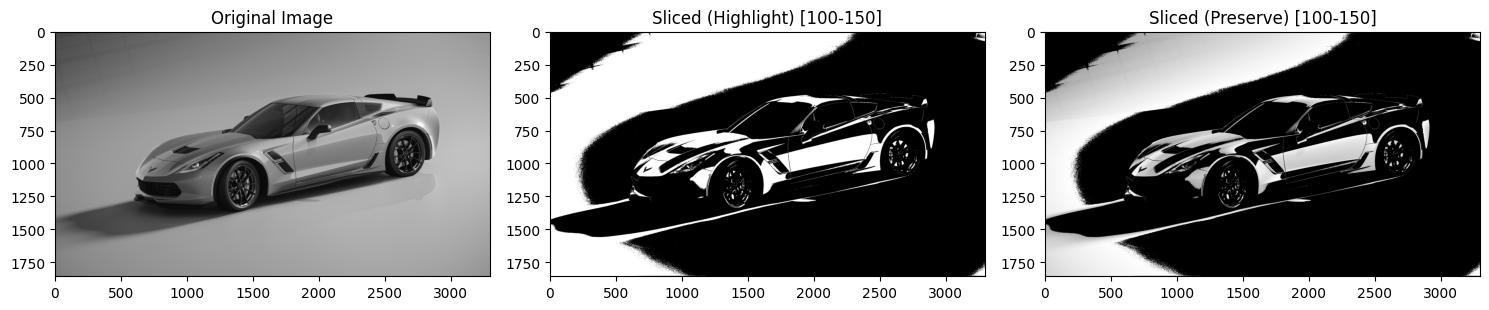

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Define the range for gray level slicing [lower_bound, upper_bound]
    lower_bound = 100
    upper_bound = 150

    # Implement gray level slicing (highlighting the range)
    sliced_image_highlight = np.zeros_like(image)
    # Create a mask for pixels within the specified range
    mask = (image >= lower_bound) & (image <= upper_bound)
    sliced_image_highlight[mask] = 255 # Set pixels in range to white
    sliced_image_highlight[~mask] = 0   # Set pixels outside range to black

    # Implement gray level slicing (preserving the range, setting others to black)
    sliced_image_preserve = np.zeros_like(image)
    sliced_image_preserve[mask] = image[mask] # Preserve pixels in the range

    # Display original and sliced images
    plt.figure(figsize=(15, 5))
    plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(132), plt.imshow(sliced_image_highlight, cmap='gray'), plt.title(f'Sliced (Highlight) [{lower_bound}-{upper_bound}]')
    plt.subplot(133), plt.imshow(sliced_image_preserve, cmap='gray'), plt.title(f'Sliced (Preserve) [{lower_bound}-{upper_bound}]')
    plt.tight_layout()
    plt.show()

### Activity 3: Bit-Plane Slicing

**Description:**
Bit-plane slicing decomposes an image into its individual binary bit planes. An 8-bit grayscale image can be decomposed into 8 bit planes, where each plane represents the contribution of a specific bit (from 0 to 7) to the overall image intensity. Analyzing bit planes can reveal information about the significance of each bit to the visual appearance and quality of the image.

**Task:**
Implement bit-plane slicing in Python and extract all 8 bit planes. Show the code and the output result (original image and bit planes from MSB to LSB).

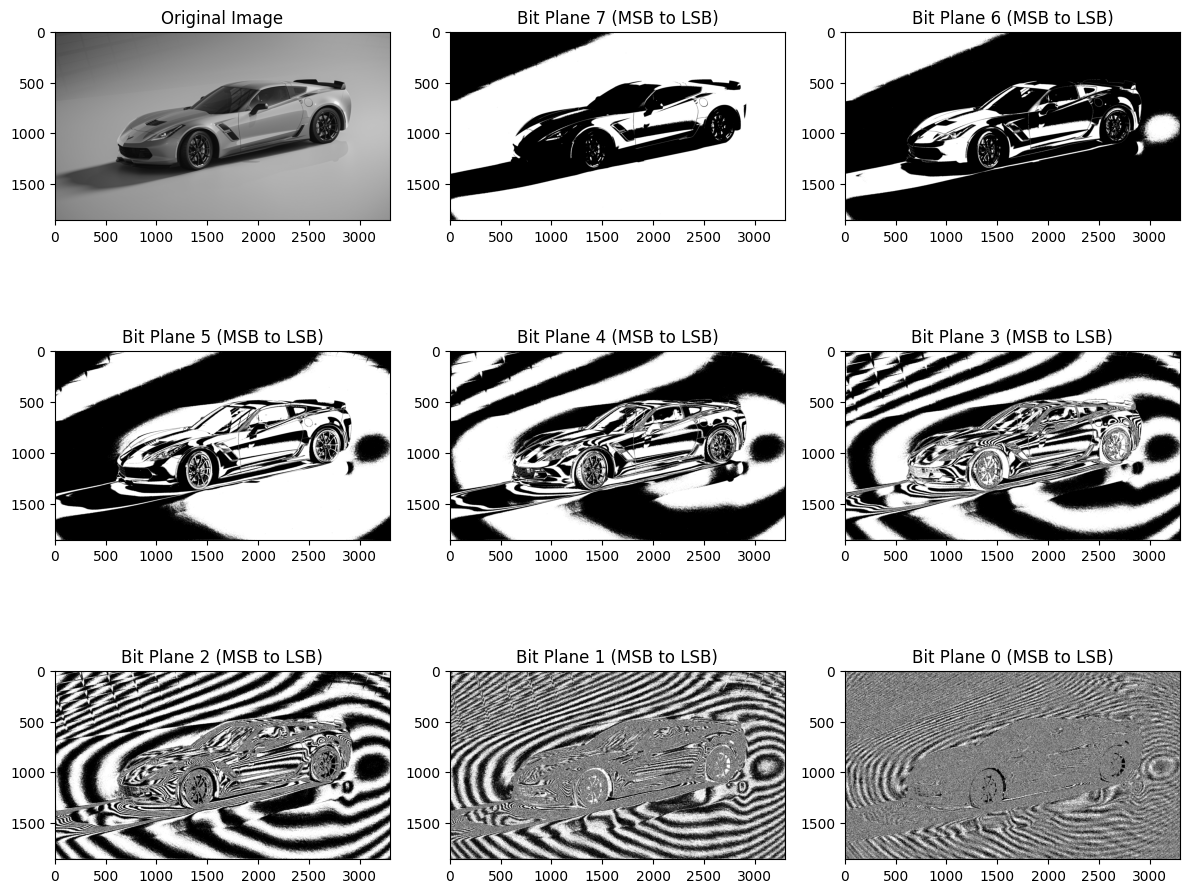

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Extract bit planes
    bit_planes = []
    for i in range(8):
        # Create a mask for the i-th bit
        plane = np.full(image.shape, 2**i, dtype=np.uint8)
        # Apply the mask to get only the i-th bit
        bit_plane = cv2.bitwise_and(image, plane)
        # Scale the bit plane for visualization (0 or 255)
        # If a bit is set (non-zero after AND operation), set the pixel to 255
        bit_plane[bit_plane > 0] = 255
        bit_planes.append(bit_plane)

    # Display original image and bit planes
    plt.figure(figsize=(12, 10))
    plt.subplot(3, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    # Display bit planes from MSB (Bit 7) to LSB (Bit 0)
    for i in range(8):
        plt.subplot(3, 3, i + 2), plt.imshow(bit_planes[7 - i], cmap='gray'), plt.title(f'Bit Plane {7 - i} (MSB to LSB)')

    plt.tight_layout()
    plt.show()

### Activity 4: Smoothing/Sharpening Filters

**Description:**
Spatial filtering techniques involve convolving an image with a kernel (or mask) to modify pixel values based on their neighbors. These filters are used for various purposes, including noise reduction (smoothing) and edge enhancement (sharpening).

**Task:**
Enhance and analyze hidden or less-visible objects/features in an image by applying both smoothing and sharpening spatial filtering techniques.

#### Part A - Smoothing Filters (Noise Reduction & Background Enhancement)

**Description:**
Smoothing filters are used to reduce noise and blur sharp edges in an image. They typically operate by averaging pixel values within a neighborhood. Order-statistic filters are non-linear filters that sort the pixel values in a neighborhood and select a value based on its rank (e.g., median, minimum, maximum).

**Techniques:**

* Smoothing Spatial Filtering (e.g., 3x3 Moving Average Filter)
* Order-Statistic Nonlinear Filters:
    * Median Filter
    * Min Filter
    * Max Filter

**Task:**
Select an image of your choice and investigate hidden or obscured objects in the background using the listed smoothing techniques. Show the code and the output results for each filter.

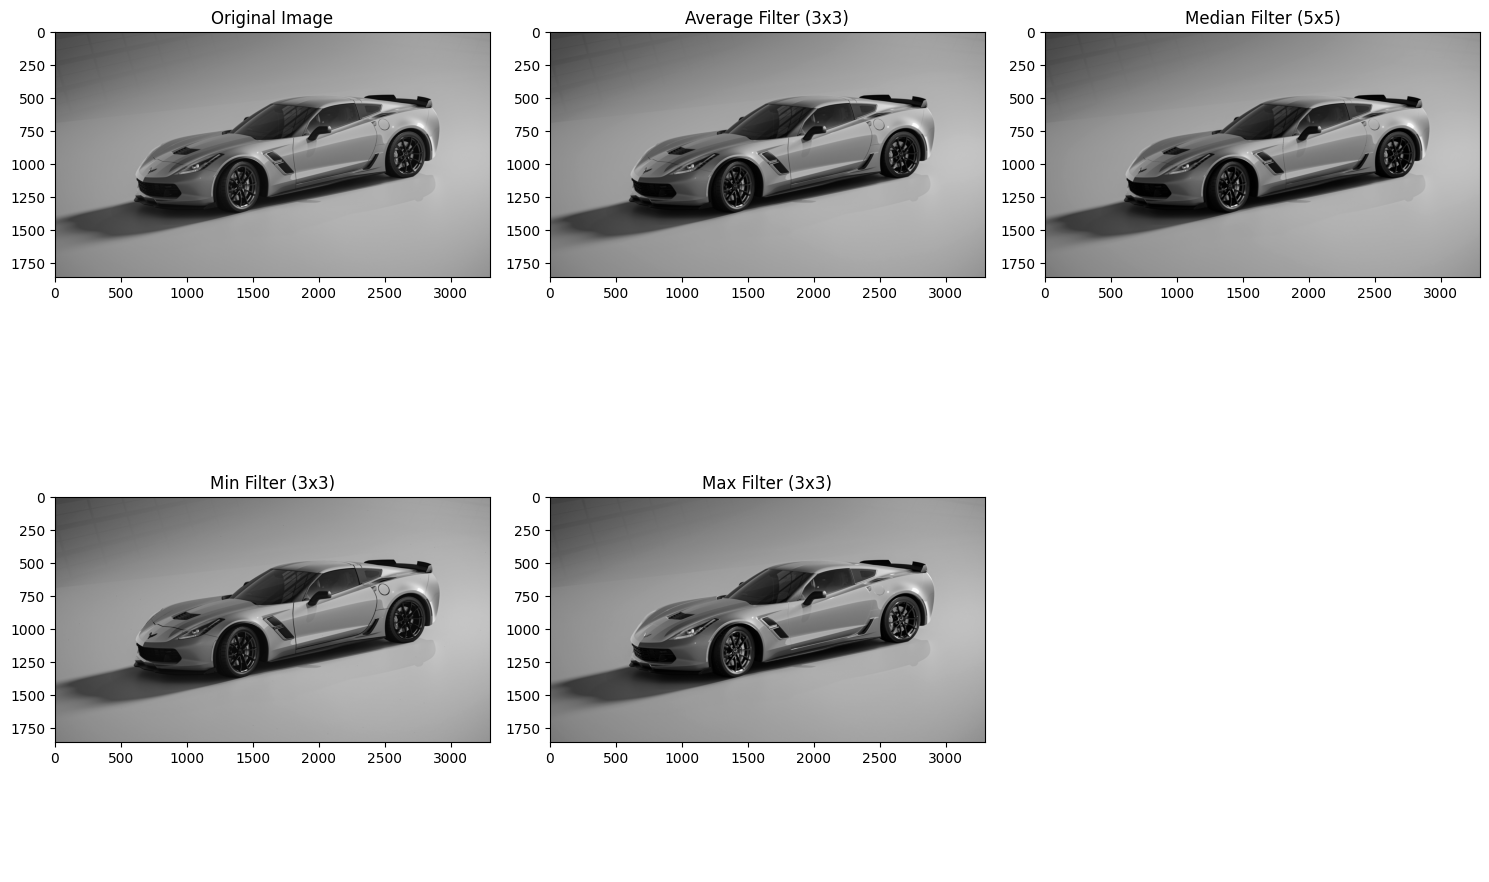

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import minimum_filter, maximum_filter # Import for min/max filters

# Load the image
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Apply Smoothing Spatial Filter (3x3 Moving Average)
    kernel_size_avg = (3, 3)
    average_filtered_image = cv2.blur(image, kernel_size_avg)

    # Apply Median Filter
    # Kernel size must be odd (e.g., 3, 5, 7)
    kernel_size_median = 5
    median_filtered_image = cv2.medianBlur(image, kernel_size_median)

    # Apply Min Filter
    kernel_size_minmax = 3
    min_filtered_image = minimum_filter(image, size=kernel_size_minmax)

    # Apply Max Filter
    max_filtered_image = maximum_filter(image, size=kernel_size_minmax)

    # Display original and smoothed images
    plt.figure(figsize=(15, 10))
    plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(232), plt.imshow(average_filtered_image, cmap='gray'), plt.title(f'Average Filter ({kernel_size_avg[0]}x{kernel_size_avg[1]})')
    plt.subplot(233), plt.imshow(median_filtered_image, cmap='gray'), plt.title(f'Median Filter ({kernel_size_median}x{kernel_size_median})')
    plt.subplot(234), plt.imshow(min_filtered_image, cmap='gray'), plt.title(f'Min Filter ({kernel_size_minmax}x{kernel_size_minmax})')
    plt.subplot(235), plt.imshow(max_filtered_image, cmap='gray'), plt.title(f'Max Filter ({kernel_size_minmax}x{kernel_size_minmax})')
    # Add an empty subplot or another image if needed to fill the grid
    plt.subplot(236), plt.axis('off') # Turn off axis for empty subplot

    plt.tight_layout()
    plt.show()

#### Part B - Sharpening Filter (Detail Enhancement & Edge Detection)

**Description:**
Sharpening filters are used to enhance edges and fine details in an image. They typically work by highlighting the differences in intensity between neighboring pixels. The Laplacian filter is a common second-order derivative operator used for edge detection and sharpening.

**Technique:**

* Laplacian Filter

**Task:**
Use the same image from Part A to enhance important visual features (e.g., edges, textures, fine details) using the Laplacian filter. Show the code and the output result (original image and sharpened image).

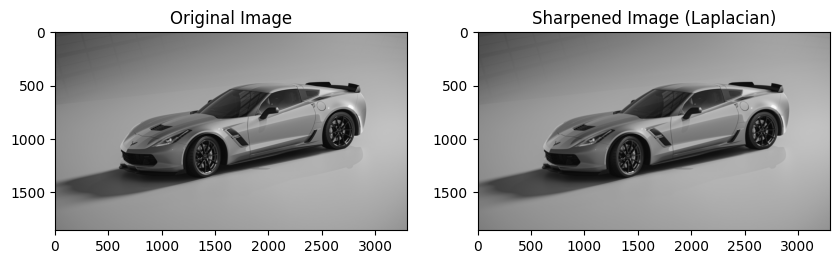

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image (or use the same image loaded in Part A)
# Replace 'your_image_path.jpg' with the actual path to your image file
image = cv2.imread('image.jpg', 0) # Load as grayscale

# Check if image loading was successful
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Apply Laplacian Filter
    # cv2.CV_64F is used for the output depth to avoid overflow issues
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # Convert back to uint8 and calculate the sharpened image
    # A common way to sharpen is to add the Laplacian to the original image
    # However, subtracting the Laplacian can also enhance details depending on the kernel definition
    # Let's use a simple method: original + scaled Laplacian
    # You might need to experiment with the scaling factor for the Laplacian
    sharpened_image = cv2.convertScaleAbs(image + laplacian)

    # Alternatively, a simpler sharpening approach is original - Laplacian (if Laplacian highlights edges as negative values)
    # sharpened_image = cv2.convertScaleAbs(image - laplacian)

    # Display original and sharpened images
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
    plt.subplot(122), plt.imshow(sharpened_image, cmap='gray'), plt.title('Sharpened Image (Laplacian)')
    plt.show()